# Question 3 – Statistics - Regression Analysis (35 marks)

In this question you will perform a linear regression. You are given a dataset (housing.csv) which includes information concerning housing in the area of Boston Mass. We will investigate whether the value of a house can be predicted from the information provided. The column names and a short description is provided below:

```
Columns description:
- CRIM - per capita crime rate by town
- INDUS - proportion of non-retail business acres per town
- NOX - nitric oxides concentration (parts per 10 million)
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RM - average number of rooms per dwelling
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's
```

## Q3.a - Linear regression: Measure predictors(10 marks)
Implement a function `measure_predictors(filepath)` where `filepath` is the the path to `housing.csv`. The functions should fit the model using all available features `CRIM, INDUS, NOX, AGE, DIS, RM, TAX, PTRATIO, B, LSTAT` as predictors and the value of the house, `MEDV`, as the target. After fitting the model, print the summary of the model and the predictors that can be assumed to be insignificant based on their pvalue (given $\alpha = 0.05$).

In [ ]:
import os
import pandas as pd
from statsmodels.api import OLS
import statsmodels.api as sm
def measure_predictors(filepath):

    '''
    This function compiles a subset of variables which are non-significant from the given data that can be used as predictors for a regression model base upon their adjusted r-squared values and p-values.
          Parameters:
                    filepath: the path of dataset 
                    alpha: a float value representing the level of significance for selecting the variables.
            Returns:
                 summary:Prints the summary of the fitted model with all the available variables and the insignificant variables which are rejected in fitting to the model.
                 
    '''
    normal = os.path.normpath(filepath)
    df = pd.read_csv(normal)
    X = df.drop('MEDV', axis=1)
    y = df['MEDV']
    #Step 1(fitting the model with all the available predictor variables)
    X_const = sm.add_constant(X)
    model = OLS(y, X_const).fit()
    summary=model.summary()
    #Step 2(Removal of insignificant variables from p-values)
    p_values = model.pvalues[1:]
    alpha=0.05
    max_p_value = p_values >= alpha
    non_significant_predictors=[]
    non_significant_predictors.append(max_p_value)
    
    print(summary)
    print(non_significant_predictors)

In [ ]:
measure_predictors('housing.csv')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.25e-106
Time:                        12:00:16   Log-Likelihood:                -1162.4
No. Observations:                 394   AIC:                             2347.
Df Residuals:                     383   BIC:                             2391.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3056      5.665      4.644      0.0

## Q3.b - Linear regression: Interaction analysis (8 marks)

Implement a function `interaction_model(filename, var1, var2)` where `filepath` is the the path to `housing.csv` and `var1` and `var2` are the variables which their interaction term is included. The functions should fit the model using all available features `CRIM, INDUS, NOX, AGE, DIS, RM, TAX, PTRATIO, B, LSTA` plus the interaction term of `var1` and `var2` as predictors, and the value of the house, `MEDV`, as the target. After fitting the model, print the summary of the model. 

How the model's performance change when the interaction of `LSTAT` and `CRIM` is added when compared to the model of Q3.a (based on adjusted R-squared)?

In [ ]:
def interaction_model(filename, var1, var2):
    '''
    This function adds an interaction term to the model with all the available variable features and check the model performance based on their adjusted r-squared values.After adding the interaction term there is slight change in the accuarcy compared to previous model based on adjusted R-squared.     
            Parameters:
                filename: the path of dataset 
                var1:the 'LSTAT' column in the original df
                var2: the 'CRIM' column in the original df
            Returns:
                summary:Prints the summary of the fitted model with all the available variables plus interaction term (LSTAT*CRIM). 
                 
     '''
    normal = os.path.normpath(filename)
    df = pd.read_csv(normal)
    #Adding an interaction term and creating a series dataframe to store the column
    int_term = var1 + "*" + var2
    df1= pd.Series(df[var1] * df[var2], name=int_term)
    #Merging the original df with the series df
    interaction_df=df.merge(df1,left_index=True,right_index=True)
    X = interaction_df.drop('MEDV', axis=1)
    y = interaction_df['MEDV']
    X_const = sm.add_constant(X)
    #Fitting the merged df into model and compare model performance with previous function
    int_model=OLS(y,X_const).fit()
    summary=int_model.summary()    
    print(summary)
    

In [ ]:
interaction_model('housing.csv', 'LSTAT', 'CRIM')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.38e-106
Time:                        19:51:58   Log-Likelihood:                -1160.6
No. Observations:                 394   AIC:                             2345.
Df Residuals:                     382   BIC:                             2393.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.4593      5.647      4.686      0.0

## Q3.c - Polynomial regression: Best model & house predictor(12 marks)

Often the dataset provided is not linearly separable and a simple linear regression model may not be able to derive relationships between both the independent and dependent variables. In such cases, a possible solution would be to implement polynomial regression instead. Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

Example: Given y the depedent variable, x<sub>1</sub>, x<sub>2</sub> the independent variables, b<sub>0</sub> the bias and b<sub>1</sub>,b<sub>2</sub>,...,b<sub>n</sub> the weights a polynomial regression of degree 2 would have the form:

y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub>  + b<sub>2</sub>x<sub>1</sub><sup>2</sup> + b<sub>3</sub>x<sub>2</sub>  + b<sub>4</sub>x<sub>2</sub><sup>2</sup>

Implement a function `polynomial_model(df, indepedent_var, dependent_var, degrees)` which given a dataframe `df`, a list of columns indicating the independent variables `indepedent_var`, a string indicating the dependent variable name `dependent_var`, and a list of integers indicating the degrees to test `degrees`, will return the best fitted regression model, best Adj. R-squared score and best degree.

Then, use the housing dataset, drop any features that were deemed non-significant in Q3.a, and find the degree that yields the best polynomial model (according to the adjusted R-squared metric) to predict the value of a house.



In [ ]:
def polynomial_model(df, indepedent_var, dependent_var, degrees):
    '''
    This function uses the  variables from the previous function to calculate all possible combinations of it and polynomial degrees to yeild the best polynomial model,adjusted r2 and best degree.
            Parameters:
                    df: a dataframe containing info about housing in the area of Boston Mass
                    indepedent_var: a list of significant variables calculated from the previous fucntion based on their p-values
                    dependent_var:  response variable for the polynomial regression model
                    degrees: a list of integers contaning polynomial degrees to test for the best fit polynomial model
            Returns:
                    best_model, best_score, best_degree: the best fit polynomial model along with its degree and adjusted Rsquare values respectively.
    '''

    adj_rsq=[]
    best_fit=[]
    formula_list=[]
    #Calcuting the polynomial formula and fitting the model for each degree
    formula= "{} ~ {}".format(dependent_var,' + '.join(indepedent_var))
    #Selecting best-fit polynomial model from models of all degrees
    for i in degrees:
        model=sm.OLS.from_formula(formula,df).fit()
        best_fit.append(model)
        adj_rsq.append(model.rsquared_adj)
        for s in indepedent_var:
            formula=formula +" + I("+ s +" ** "+ str(i)+")"
    #finding the best_degree and best score from the best fit model selected from above        
    adj_rsq.append(model.rsquared_adj)
    best_fit.append(model)
    max_value =max(adj_rsq)
    index = adj_rsq.index(max_value) 
    best_score=adj_rsq[index]
    best_model= best_fit[index]
    best_degree= index+1   
    return best_model, best_score, best_degree
  
        

In [ ]:
# Example
df = pd.read_csv("housing.csv")
indepedent_var = ['PTRATIO', 'LSTAT', 'DIS' , 'RM', 'NOX', 'B'] # remember to exclude potential non-significant predictors
dependent_var = 'MEDV'
degrees = [1,2,3,4,5,6]

fitted_model, adj_rsquare, degree = polynomial_model(df, indepedent_var, dependent_var, degrees)
print(fitted_model,adj_rsquare,degree)

<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C492893A30> 0.8292962957730099 6


## Q3.d - Residual analysis: Plot (5 marks)

Metrics such as adjusted R-square and R-square provide useful insights but they do not necessary indicate an appropriate model. Residual analysis is used to assess the appropriateness of a linear regression model by defining residuals and examining the residual plot graphs. Perform a residual analysis on the best model acquired from Question Q3.c) by plotting and interpreting the residuals vs fitted values plot. Implement a function `plot_residuals(model)` where `model` is a fitted model (in your case the one returned from `polynomial_model(df, indepedent_var, dependent_var, degrees)` function in Q3.c) that plots the residuals vs the fitted values. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_residuals(model):
    '''
    This function visualises and evaluates the residual analysis to assess appropriateness of the model.

            Parameters:
                   model: the best model which is known from the previous function
            Returns:
                 plot:  residuals vs Fitted values is  plotted, by examining the residual plot we can predict the housing in the area of Boston Mass
    '''
    #Fitted values 
    model_fitted_y=model.fittedvalues
    #plot
    plot = sns.residplot(x=model_fitted_y, y='MEDV', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 2})
    # Titel and labels
    plot.set_title('Residuals vs Fitted')
    plot.set_xlabel('Fitted values')
    plot.set_ylabel('Residuals')
    # your code for plotting here

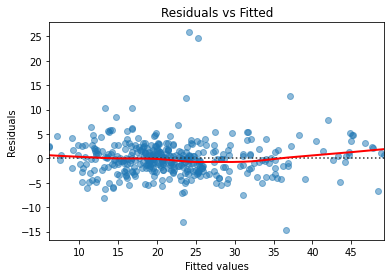

In [ ]:
plot_residuals(fitted_model)